In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import h5py

### inspection

In [71]:
# import mat files for A1
file_paths = glob.glob("../data/A1/*.mat")
file_paths.sort()
file_paths

['../data/A1/Data1.mat',
 '../data/A1/Data10.mat',
 '../data/A1/Data11.mat',
 '../data/A1/Data12.mat',
 '../data/A1/Data13.mat',
 '../data/A1/Data14.mat',
 '../data/A1/Data15.mat',
 '../data/A1/Data16.mat',
 '../data/A1/Data17.mat',
 '../data/A1/Data18.mat',
 '../data/A1/Data19.mat',
 '../data/A1/Data2.mat',
 '../data/A1/Data20.mat',
 '../data/A1/Data21.mat',
 '../data/A1/Data22.mat',
 '../data/A1/Data23.mat',
 '../data/A1/Data24.mat',
 '../data/A1/Data25.mat',
 '../data/A1/Data3.mat',
 '../data/A1/Data4.mat',
 '../data/A1/Data5.mat',
 '../data/A1/Data6.mat',
 '../data/A1/Data7.mat',
 '../data/A1/Data8.mat',
 '../data/A1/Data9.mat']

In [73]:
# get example file path
example_file_path = file_paths[0]
example_file_path

'../data/A1/Data1.mat'

In [74]:
# load .mat file
data = h5py.File(example_file_path, 'r')
data.keys()

<KeysViewHDF5 ['Ch1', 'Ch2', 'Ch3', 'Ch31', 'Ch32', 'Ch4', 'Ch5', 'Ch6', 'file']>

Channel 3: TTLs an die Kamera\
Channel 4: Sound trigger\
Channel 31: Keyboard

#### keyboard times

In [75]:
ch31 = data["Ch31"]
ch31.keys()

<KeysViewHDF5 ['codes', 'comment', 'length', 'resolution', 'times', 'title']>

In [76]:
np.array(ch31["codes"]).flatten()

array([ 67, 119,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=uint8)

In [77]:
np.array(ch31["times"]).flatten()

array([ 0.703638,  6.18565 , 15.925618])

In [78]:
keyboard_trigger_times = np.array(ch31["times"]).flatten()[1:-1]
keyboard_trigger_times

array([6.18565])

In [79]:
start_time = np.array(ch31["times"]).flatten()[0]
start_time

0.703638

In [80]:
keyboard_trigger_times_cut = keyboard_trigger_times - start_time
keyboard_trigger_times_cut

array([5.482012])

#### TTL trigger times

In [81]:
ch3 = data["Ch3"]
ch3.keys()

<KeysViewHDF5 ['comment', 'interval', 'length', 'offset', 'scale', 'start', 'times', 'title', 'units', 'values']>

In [82]:
ttl = np.array(ch3["values"]).flatten()
ttl_times = np.array(ch3["times"]).flatten()
ttl.shape, ttl_times.shape

((577955,), (577955,))

In [83]:
ttl, ttl_times

(array([-0.00228882, -0.00457764, -0.0038147 , ..., -0.00457764,
        -0.0038147 , -0.0038147 ]),
 array([1.2000000e-05, 5.2000000e-05, 9.2000000e-05, ..., 2.3118092e+01,
        2.3118132e+01, 2.3118172e+01]))

cut to start with keyboard press

In [84]:
ttl_cut = ttl[ttl_times > start_time]
ttl_times = ttl_times - ttl_times[0]
ttl_times_cut = ttl_times[ttl_times > start_time] - start_time
ttl_times_cut = ttl_times_cut - ttl_times_cut[0]
ttl_times_cut

array([0.000000e+00, 4.000000e-05, 8.000000e-05, ..., 2.241444e+01,
       2.241448e+01, 2.241452e+01])

In [85]:
# count ttl triggers
ttl_triggers_idx = np.where(np.diff(ttl_cut) > 2)[0]
len(ttl_triggers_idx)

381

#### sound stimulus

In [19]:
ch4 = data["Ch4"]
ch4.keys()

<KeysViewHDF5 ['comment', 'interval', 'length', 'offset', 'scale', 'start', 'times', 'title', 'units', 'values']>

In [20]:
sound = np.array(ch4["values"]).flatten()
sound_times = np.array(ch4["times"]).flatten()
sound.shape, sound_times.shape

((1071144,), (1071144,))

In [21]:
sound, sound_times

(array([-0.00076294, -0.0012207 , -0.00061035, ..., -0.00015259,
         0.00076294,  0.00015259]),
 array([2.000000e-05, 6.000000e-05, 1.000000e-04, ..., 4.284566e+01,
        4.284570e+01, 4.284574e+01]))

cut to start with keyboard press

In [24]:
sound_cut = sound[sound_times > start_time]
sound_times = sound_times - sound_times[0]
sound_times_cut = sound_times[sound_times > start_time] - start_time
sound_times_cut = sound_times_cut - sound_times_cut[0]
sound_times_cut

array([0.000000e+00, 4.000000e-05, 8.000000e-05, ..., 3.933264e+01,
       3.933268e+01, 3.933272e+01])

plot all channels

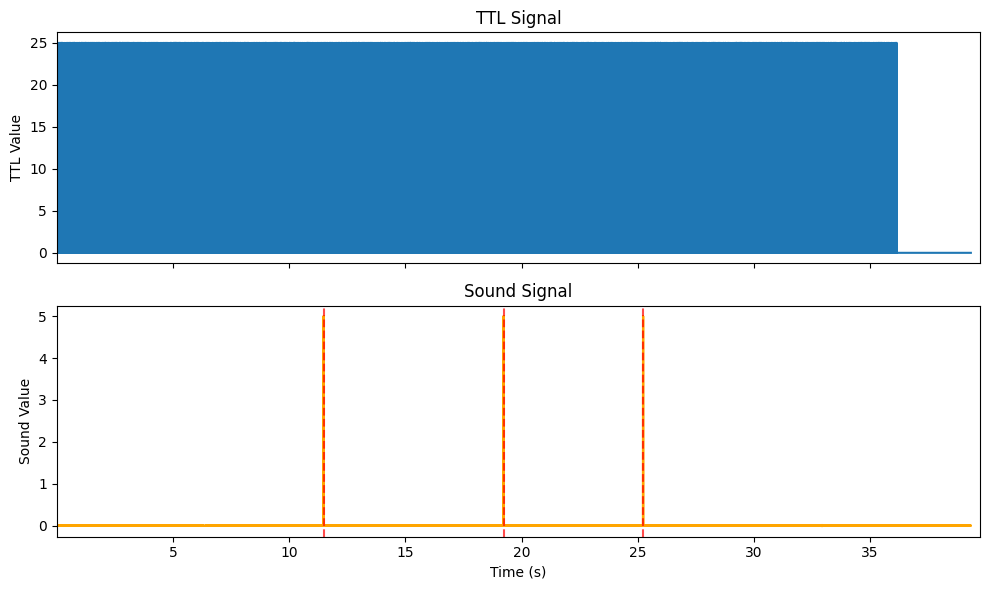

In [23]:
# plot ttl and sound signal in two separte windows below each other
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
axs[0].plot(ttl_times_cut, ttl_cut)
axs[0].set_title("TTL Signal")
axs[0].set_ylabel("TTL Value")
axs[0].set_xlim(sound_times_cut[0], sound_times_cut[-1] * 1.01)
axs[1].plot(sound_times_cut, sound_cut, color='orange')
axs[1].set_title("Sound Signal")
axs[1].set_ylabel("Sound Value")
axs[1].set_xlabel("Time (s)")
# plot keyboard triggers as vertical lines
for kt in keyboard_trigger_times_cut:
    axs[1].axvline(x=kt, color='red', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

look at minor difference


In [25]:
ttl_times_cut

array([0.000000e+00, 4.000000e-05, 8.000000e-05, ..., 3.933264e+01,
       3.933268e+01, 3.933272e+01])

In [26]:
sound_times_cut

array([0.000000e+00, 4.000000e-05, 8.000000e-05, ..., 3.933264e+01,
       3.933268e+01, 3.933272e+01])

In [27]:
sound_cut.shape, ttl_cut.shape

((983319,), (983319,))

compare to sound trigger times

In [30]:
keyboard_trigger_times_cut

array([11.477984, 19.222   , 25.217976])

In [51]:
# inpect 400 ms after every keyboard trigger for onset of sound trigger

sound_onset_times = np.empty_like(keyboard_trigger_times_cut)
for i, kt in enumerate(keyboard_trigger_times_cut):

    # get time window of sound signal 400 ms after keyboard trigger
    sound_window = sound_cut[(sound_times_cut > kt) & (sound_times_cut < kt + 0.4)]
    sound_times_window = sound_times_cut[(sound_times_cut > kt) & (sound_times_cut < kt + 0.4)]
    
    sound_trigger_onset = np.where(np.diff(sound_window) > 2)[0]
    if len(sound_trigger_onset) > 0:
        sound_onset_times[i] = sound_times_window[sound_trigger_onset[0] + 1]
    else:
        sound_onset_times[i] = np.nan  # no sound trigger found
        print(f"No sound trigger found for keyboard trigger at {kt:.3f} s")

In [94]:
no_trials = len(sound_onset_times)
no_trials

3

sound onset times as start points of trials, each trial has 1s pretrial and 3s trial

get time / frame association: from index of sound onset, get index of first frame triggered after sound onset, get 30 frames before and 90 frames after this.

In [95]:
ttl_cut

array([-0.00305176, -0.0038147 , -0.0038147 , ..., -0.00457764,
       -0.0038147 , -0.0038147 ])

In [97]:
ttl_times_cut

array([0.000000e+00, 4.000000e-05, 8.000000e-05, ..., 2.241444e+01,
       2.241448e+01, 2.241452e+01])

In [96]:
sound_onset_times

array([11.47896, 19.22376, 25.21996])

### video and ttl syncronization

In [61]:
import cv2
cap = cv2.VideoCapture("../data/A1/FH0002 25-11-14 14-37-02.mp4")

test if for a video it has the same number of frames as ttl triggers were sent, probably not, as some frames are dropped

In [62]:
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total number of frames: {frame_count}")

Total number of frames: 378


In [86]:
len(ttl_triggers_idx)

381

3 frames dropped

### routine to remove ahead time from data for 1 animal:
1 - ttl trigger times\
2 - sound stimulus times

not from video frames/pose data, since they automatically start at first frame sent

testing: compare frame number of video to frame number from ttl triggers

In [ ]:
# spike2 key codes
START_KEY = "C"
END_KEY = "A"


animal_path  = "../data/A1/"
animal_path = os.path.join(animal_path, "*.mat")
animal_path = os.path.abspath(animal_path)
animal_path

'/home/max/Documents/escape tracking/data/A1/*.mat'

In [ ]:
for file in glob.glob(animal_path):
    data = h5py.File(file, "r")
    ch31 = data["Ch31"]
    codes = np.array(ch31["codes"]).flatten()
    times = np.array(ch31["times"]).flatten()

    # get start and end times of video recording from channel 31
    start_idx = np.where(codes == ord(START_KEY))[0][0]  # should be always zero
    assert start_idx == 0, "Start key not found at the beginning of the file"

    try:
        end_idx = np.where(codes == ord(END_KEY))[0][0]
    except IndexError:
        raise ValueError(f"End key missing in file {file}")

    start_time = times[start_idx]
    end_time = times[end_idx]

    # let recording time start at 0

    # TTL CHANNEL
    ch3 = data["Ch3"]
    ttl = np.array(ch3["values"]).flatten()
    ttl_times = np.array(ch3["times"]).flatten()
    ttl_times = ttl_times - ttl_times[0]  # set start time to 0

    ttl_cut = ttl[(ttl_times > start_time) & (ttl_times < end_time)]
    ttl_times_cut = ttl_times[(ttl_times > start_time) & (ttl_times < end_time)]
    ttl_times_cut = ttl_times_cut - start_time  # set start time beginning of key press

    # SOUND CHANNEL
    ch4 = data["Ch4"]
    sound = np.array(ch4["values"]).flatten()
    sound_times = np.array(ch4["times"]).flatten()
    sound_times = sound_times - sound_times[0]  # set start time to 0

    sound_cut = sound[(sound_times > start_time) & (sound_times < end_time)]
    sound_times_cut = sound_times[(sound_times > start_time) & (sound_times < end_time)]
    sound_times_cut = sound_times_cut - start_time  # set start time to 0

    # get stimulus trigger times
    ttl_triggers_idx = np.where(np.diff(ttl_cut) > 2)[0]
    n_triggers = len(ttl_triggers_idx)

WICHTIG: ich brauche die zeit garnicht zu korrigieren, da ich komplett über die frames gehen kann. auch für die sync mit den pose daten.